# Titanic Machine Learning

    https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Style
sns.set_palette("deep", 8)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check if there is NaN
data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Check if there is NaN
test_data.isnull().sum().to_frame()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [7]:
# Drop whats unecessary
data = data.drop(columns=['Cabin', 'Ticket'])
test_data = test_data.drop(columns=['Cabin', 'Ticket'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Data manipulation and Feature Engineering

**Add feature FamilySize**

In [8]:
data['FamilySize'] = [x + y for x, y in zip(data['Parch'], data['SibSp'])]
test_data['FamilySize'] = [x + y for x, y in zip(test_data['Parch'], test_data['SibSp'])]

In [9]:
# Categorize
def family_size_category(size):
    if size >= 5: return 3
    elif 3 <= size < 5: return 2
    elif 1 <= size < 3: return 1
    else: return 0

data["FamilySize"] = data['FamilySize'].map(family_size_category)
test_data["FamilySize"] = test_data['FamilySize'].map(family_size_category)

**Convert Sex to binary**

In [10]:
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

**Deal with Embarked**

In [11]:
# Fill Nan - Embarked
# Find most frequent category in column (mode()[0]) an fill NaN with it
embarked_freq = data['Embarked'].dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(embarked_freq)

In [12]:
# Convert to numeric
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)

**Get titles from Name**

In [13]:
# Use .extract(REGEX) to extract titles only
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
data['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Col,2
Major,2
Mme,1


In [15]:
for i, row in data.iterrows():
    if (row['Title'] not in ["Mr", "Miss", "Mrs", "Master"]):    
        data['Title'][i] = "Other"

for i, row in test_data.iterrows():
    if (row['Title'] not in ["Mr", "Miss", "Mrs", "Master"]):    
        test_data['Title'][i] = "Other"

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [16]:
data['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Other,27


In [17]:
# Convert to int 
data['Title'] = data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}).astype(int)
test_data['Title'] = test_data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}).astype(int)

data['Title'].value_counts().to_frame()

,Title
0,517
1,182
2,125
3,40
4,27


**Fare Categories**

In [18]:
# Check distribution
print(pd.qcut(data['Fare'], 4).value_counts().to_frame())

                 Fare
(7.91, 14.454]    224
(-0.001, 7.91]    223
(31.0, 512.329]   222
(14.454, 31.0]    222


In [19]:
# Fill missing fare on test data
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [20]:
# Apply categories with labels
data['FareCategory'] = pd.qcut(data['Fare'], 4, labels=[0,1,2,3]).astype(int)
test_data['FareCategory'] = pd.qcut(test_data['Fare'], 4, labels=[0,1,2,3]).astype(int)

data['FareCategory'].value_counts().to_frame()

,FareCategory
1,224
0,223
3,222
2,222


**Clean up**

In [21]:
# Save PassengerId for later
passenger_id = test_data['PassengerId']

# Drop whats unecessary
data = data.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Fare', 'Name'])
test_data = test_data.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Fare', 'Name'])

In [22]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title,FareCategory
0,0,3,0,22.0,2,1,0,0
1,1,1,1,38.0,0,1,2,3
2,1,3,1,26.0,2,0,1,1
3,1,1,1,35.0,2,1,2,3
4,0,3,0,35.0,2,0,0,1


In [23]:
test_data.head()

,Pclass,Sex,Age,Embarked,FamilySize,Title,FareCategory
0,3,0,34.5,1,0,0,0
1,3,1,47.0,2,1,2,0
2,2,0,62.0,1,0,0,1
3,3,0,27.0,2,0,0,1
4,3,1,22.0,2,1,2,1


**Deal with Age NaN and divide into categories** (Train set)

In [24]:
#Replace NaN with mean for Age
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
# Select training data
XClean = data.dropna(axis=0, how='any')
X = XClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
y = data[['Age']].dropna()

In [26]:
# Select test data (rows missing Age) 
XTestClean = data.loc[pd.isnull(data[['Age']]).any(axis=1)]
XTest = XTestClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
yToFill = XTestClean[['Age']]

In [27]:
# Fit and predict
linreg = LinearRegression()
linreg.fit(X, y)

# predict
yPred = linreg.predict(XTest).flatten().tolist()

In [28]:
# Replace NaN with predicted Age values
yToFill['Age'] = yPred
data['Age'] = data.combine_first(yToFill)
print(data.Age[200:210])

200    28.000000
201    19.918136
202    34.000000
203    45.500000
204    18.000000
205     2.000000
206    32.000000
207    26.000000
208    16.000000
209    40.000000
Name: Age, dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# Categorize
def age_category(age):
    if age >= 60: return 4
    elif 21 <= age < 60: return 3
    elif 12 <= age < 21: return 2
    elif 3 <= age < 12: return 1
    else: return 0

data["Age"] = data['Age'].map(age_category)

**Deal with Age NaN and divide into categories** (Test set)

In [30]:
# Select data (rows missing Age) 
XTestClean = test_data.loc[pd.isnull(test_data[['Age']]).any(axis=1)]
XTest = XTestClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
test_yToFill = XTestClean[['Age']]

# predict
yPred = linreg.predict(XTest).flatten().tolist()

# Replace NaN with predicted Age values
test_yToFill['Age'] = yPred
test_data['Age'] = test_data.combine_first(test_yToFill)

# Categorize
test_data["Age"] = test_data['Age'].map(age_category)
print(test_data.Age[200:210])

200    2
201    0
202    3
203    1
204    3
205    3
206    3
207    3
208    3
209    3
Name: Age, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


**Review**

In [31]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title,FareCategory
0,0,3,0,3,2,1,0,0
1,1,1,1,3,0,1,2,3
2,1,3,1,3,2,0,1,1
3,1,1,1,3,2,1,2,3
4,0,3,0,3,2,0,0,1


In [32]:
test_data.head()

,Pclass,Sex,Age,Embarked,FamilySize,Title,FareCategory
0,3,0,3,1,0,0,0
1,3,1,3,2,1,2,0
2,2,0,4,1,0,0,1
3,3,0,3,2,0,0,1
4,3,1,3,2,1,2,1


In [33]:
# Check if there is NaN
print(data.isnull().sum().to_frame())

              0
Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
FamilySize    0
Title         0
FareCategory  0


In [34]:
# Check if there is NaN
print(test_data.isnull().sum().to_frame())

              0
Pclass        0
Sex           0
Age           0
Embarked      0
FamilySize    0
Title         0
FareCategory  0


In [35]:
print(data.dtypes)

Survived        int64
Pclass          int64
Sex             int32
Age             int64
Embarked        int32
FamilySize      int64
Title           int32
FareCategory    int32
dtype: object


## Analysing

In [36]:
data['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [37]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


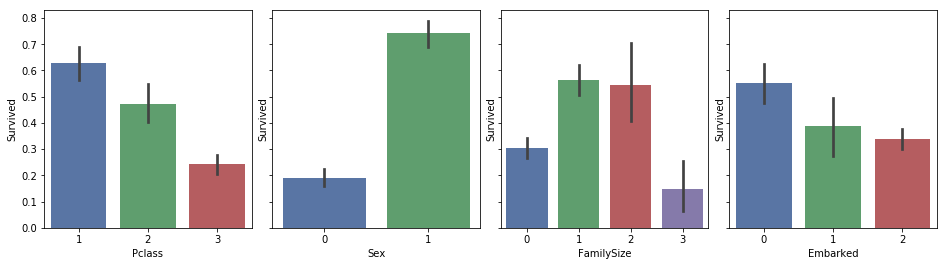

In [38]:
#Create figure & adjust
fig, ax1 = plt.subplots(1, 4, gridspec_kw={'height_ratios':[1]}, figsize=(16,4), sharey=True)
fig.subplots_adjust(wspace=0.1)

#Plot
sns.barplot(x="Pclass", y="Survived", data=data, ax=ax1[0])
sns.barplot(x="Sex", y="Survived", data=data, ax=ax1[1])
sns.barplot(x="FamilySize", y="Survived", data=data, ax=ax1[2])
sns.barplot(x="Embarked", y="Survived", data=data, ax=ax1[3]);

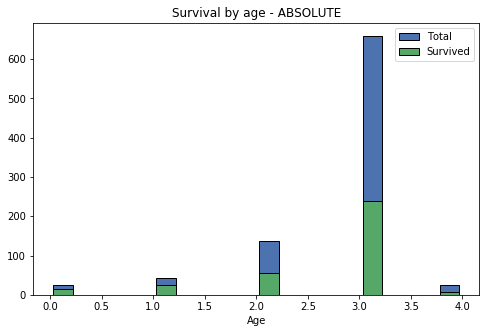

In [39]:
plt.figure(figsize=(8,5))

sns.distplot(data['Age'], kde=False, bins=16, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0}, label=['Total'])
sns.distplot([data[data['Survived']==1]['Age']], kde=False, bins=16, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0}, label=['Survived'])

plt.legend()
plt.title('Survival by age - ABSOLUTE')
plt.xlabel('Age');

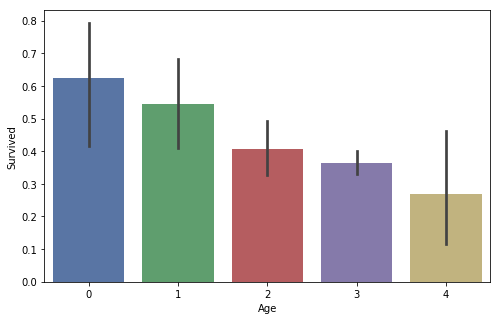

In [40]:
plt.figure(figsize=(8,5))

sns.barplot(x="Age", y="Survived", data=data)

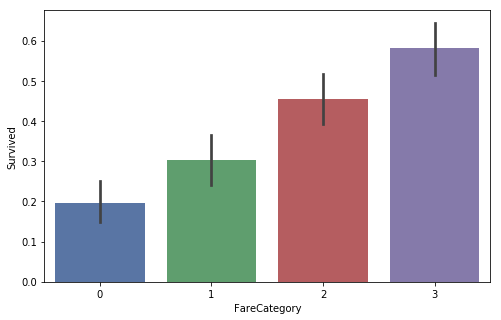

In [41]:
plt.figure(figsize=(8,5))

sns.barplot(x="FareCategory", y="Survived", data=data)

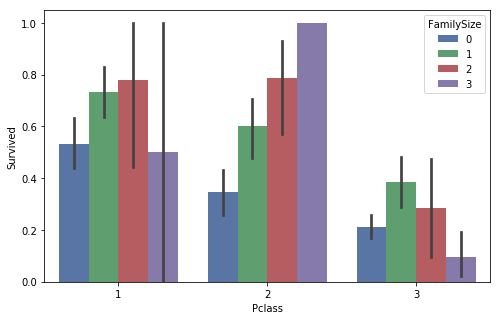

In [42]:
plt.figure(figsize=(8,5))

sns.barplot(x="Pclass", y="Survived", hue='FamilySize', data=data);

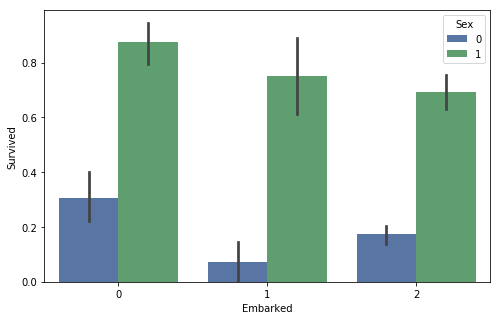

In [43]:
plt.figure(figsize=(8,5))

sns.barplot(x="Embarked", y="Survived", hue='Sex', data=data)

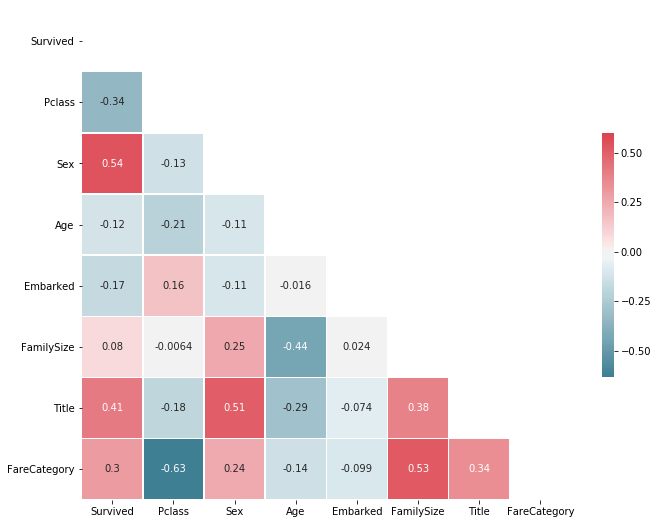

In [44]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##  Learn

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

**KNN**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X = data[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Embarked', 'Title', 'Age']]

y = data['Survived']

X_test = test_data[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Embarked', 'Title', 'Age']]

In [48]:
knn = KNeighborsClassifier()

In [49]:
kRange = list(range(1,31))
param_grid = dict(n_neighbors=kRange)

# Instantiate grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

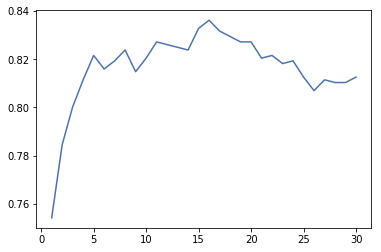

In [50]:
# Fit data
grid.fit(X,y)
grid.cv_results_

# Plot
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(kRange, grid_mean_scores)

**Multiple**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [52]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1, kernel='rbf')))
models.append(('CLF', RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)))
models.append(('MLP', MLPClassifier(alpha=1)))

In [53]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_xgb, y_xgb, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

NameError: name 'X_xgb' is not defined

In [ ]:
# boxplot algorithm comparison
# ax is need to set x tick labels
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**SVM**

In [ ]:
def svm_parameter_tuning(X,y):
    # Define parameters
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}

    # Run GridSearch & fit data
    grid = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=-1, scoring='accuracy')
    grid.fit(X, y)
    return {'best_params_':grid.best_params_, 'best_score_':grid.best_score_}

In [ ]:
svm_parameter_tuning(X,y)

In [ ]:
svm = SVC(C=1, gamma=0.1)
svm.fit(X,y)
y_pred = svm.predict(test_data)
print(list(y))
print(y_pred)

**Bagging**

**Voting**

**Ensemble**

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_xgb,y_xgb)
rfc_random.best_params_

In [ ]:
rfc_random.best_score_

In [ ]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)

In [ ]:
rfc.fit(X,y)

In [ ]:
y_pred = rfc.predict(test_data)

**Post A-Z**

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Create dummy variables for categorical variables and delete one to avoid trap
onehotencoder = OneHotEncoder()
X_xgb = pd.get_dummies(X, columns=['Embarked', 'Title'], drop_first=True)

print(X_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from xgboost import XGBClassifier

xgb = XGBClassifier()

grid = GridSearchCV(XGBClassifier(), param_grid={}, cv=10, n_jobs=-1, scoring='accuracy')
grid.fit(X_xgb, y_xgb)

grid.best_score_

In [ ]:
grid = GridSearchCV(XGBClassifier(), param_grid={}, cv=10, n_jobs=-1, scoring='accuracy')
grid.fit(X, y)

grid.best_score_

## Submission

In [ ]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': passenger_id,
                                    'Survived': y_pred })
#StackingSubmission.to_csv("Submission.csv", index=False)